# **Experiment Notebook**



In [1]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.2 which is incompatible.


In [2]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [3]:
# <Student to fill this section>


---
## A. Project Description


In [4]:
# <Student to fill this section>
student_name = "Nian-Ya, Weng"
student_id = "25176165"
group_id = "30"

In [5]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [6]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

In [7]:
# Do not modify this code
print_tile(size="h1", key='group_id', value=group_id)

---
## B. Business Understanding

In [8]:
# <Student to fill this section>
business_use_case_description = """
The goal of this project is to assist NBA teams in identifying college basketball players who are most likely to be drafted. By building a predictive model using historical player statistics, teams can make more informed scouting decisions and better allocate their resources. This tool can also support media and fan engagement platforms that predict player drafts, enhancing audience interaction and content value.
"""

In [9]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [10]:
# <Student to fill this section>
business_objectives = """
Accurate predictions can significantly improve the efficiency and success of NBA teams' draft strategies by identifying high-potential players early, reducing scouting costs, and increasing the return on investment in drafted players. It can also enhance fan engagement and media analytics products by providing more reliable draft forecasts.

On the other hand, incorrect predictions may lead to poor draft choices, missed opportunities to recruit strong players, wasted resources on ineffective scouting, and reduced confidence in analytics-driven decision-making within the organization.
"""

In [11]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [12]:
# <Student to fill this section>
stakeholders_expectations_explanations = """
The results of the predictions will be used to support NBA team management, scouts, and analysts in making informed draft decisions. The primary users of the predictions will be the team's data analytics departments and decision-makers involved in the player selection process.

Other stakeholders impacted by the predictions include players—whose draft chances and career opportunities may be affected—, media platforms that use such data for public draft forecasts, and fans who follow and engage with draft-related content. Accurate predictions are expected to improve trust in analytics and enhance engagement across these stakeholders.
"""

In [13]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [15]:
# <Student to fill this section>

import os
import pandas as pd
from pathlib import Path

# check if you are in the Colab environment
IN_COLAB = "google.colab" in str(get_ipython())

# automatically set the path
if IN_COLAB:
    from google.colab import files
    print("Colab detected. Please upload your 'train.csv' and 'test.csv' files.")
    uploaded = files.upload()
    PATH_TRAIN = "train.csv"
    PATH_TEST = "test.csv"
else:
    PATH_TRAIN = Path("data/raw/train.csv")
    PATH_TEST = Path("data/raw/test.csv")

# load data
train = pd.read_csv(PATH_TRAIN)
test = pd.read_csv(PATH_TEST)

# show basic information
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Columns in Train:", train.columns.tolist())

# display data
display(train.head())


Colab detected. Please upload your 'train.csv' and 'test.csv' files.


Saving test.csv to test (1).csv
Saving train.csv to train (1).csv
Train shape: (14774, 62)
Test shape: (1297, 61)
Columns in Train: ['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'porpag', 'adjoe', 'pfr', 'year', 'type', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade', 'dunks_ratio', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts', 'player_id', 'drafted']


,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,Pacific,BW,26,52.6,111.8,19.3,61.8,64.93,1.1,7.5,...,-1.34201,0.2308,1.5769,1.8077,2.2308,0.6538,0.0769,9.6538,681edf6e-41cb-4fd1-ba91-da573e063fbc,0.0
1,Mississippi,SEC,2,0.8,63.6,29.6,33.3,33.33,0.0,21.5,...,-5.42104,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,3542dcb7-19ad-47f2-8b3a-eb79eb3ec4c4,0.0
2,Stephen F. Austin,Slnd,4,0.6,61.4,21.7,50.0,50.00,0.0,0.0,...,6.46650,0.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.5000,ca0d8700-807d-4fce-a7a9-63922d1981e6,0.0
3,Virginia,ACC,28,59.2,88.2,21.7,46.2,47.25,1.5,9.7,...,1.45913,0.3214,2.0357,2.3571,3.0000,1.2857,0.0714,7.7500,01285c6b-bc71-4fa8-941a-28cf3976a117,0.0
4,Elon,SC,21,13.7,47.5,15.0,26.2,26.20,5.8,2.3,...,-3.75694,0.3810,0.1429,0.5238,0.4286,0.1905,0.0000,0.5714,a962c41c-55ff-461e-8585-db32e4fa0580,0.0


In [16]:
# Check the number of missing values

missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

# Show columns with missing values
print("Train missing fields")
display(missing_train[missing_train > 0])

print("Test missing fields")
display(missing_test[missing_test > 0])

Train missing fields


,0
ht,8
Rec_Rank,9885
ast_tov,1535
rimmade,2075
rimmade_rimmiss,2075
midmade,2075
midmade_midmiss,2075
rim_ratio,3203
mid_ratio,3191
dunksmade,2075


Test missing fields


,0
ht,6
Rec_Rank,894
ast_tov,125
rimmade,61
rimmade_rimmiss,61
midmade,61
midmade_midmiss,61
rim_ratio,178
mid_ratio,196
dunksmade,61


In [17]:
import numpy as np

# Delete fields with too high a missing value ratio (cannot be filled)
cols_to_drop = ['Rec_Rank', 'dunks_ratio', 'ht']
train = train.drop(columns=cols_to_drop, errors='ignore')
test = test.drop(columns=cols_to_drop, errors='ignore')

# These fields are filled with median values
num_impute_cols = [
    'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
    'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade'
]

for col in num_impute_cols:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].median())
    if col in test.columns:
        test[col] = test[col].fillna(test[col].median())

In [18]:
print("Train Missing Value Statistics (only non-zero will be shown)")
display(train.isnull().sum()[train.isnull().sum() > 0])

print("Test Missing Value Statistics (only non-zero will be shown)")
display(test.isnull().sum()[test.isnull().sum() > 0])

print("'ht' in train:", 'ht' in train.columns)
print("'Rec_Rank' in train:", 'Rec_Rank' in train.columns)
print("'dunks_ratio' in train:", 'dunks_ratio' in train.columns)

train[['ast_tov', 'rim_ratio', 'mid_ratio']].describe()


Train Missing Value Statistics (only non-zero will be shown)


,0
drtg,5
adrtg,5
dporpag,5
stops,5
bpm,5
obpm,5
dbpm,5
gbpm,5
mp,1
ogbpm,5


Test Missing Value Statistics (only non-zero will be shown)


,0


'ht' in train: False
'Rec_Rank' in train: False
'dunks_ratio' in train: False


,ast_tov,rim_ratio,mid_ratio
count,14774.000000,14774.000000,14774.000000
mean,0.816108,0.545881,0.305822
std,0.638141,0.190989,0.170348
min,0.000000,0.000000,0.000000
25%,0.407446,0.500000,0.250000
50%,0.714322,0.558600,0.315800
75%,1.066650,0.626900,0.366700
max,10.000000,1.000000,1.000000


In [19]:
# Fill the remaining missing values in train (using median)
additional_missing_cols = [
    'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp',
    'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts'
]

for col in additional_missing_cols:
    if col in train.columns:
        train[col] = train[col].fillna(train[col].median())

    if 'drtg' in train.columns:
        train['drtg'] = train['drtg'].fillna(train['drtg'].median())

print("Final missing values check")
display(train.isnull().sum()[train.isnull().sum() > 0])


Final missing values check


,0


### C.2 Define Target variable

In [ ]:
# <Student to fill this section>


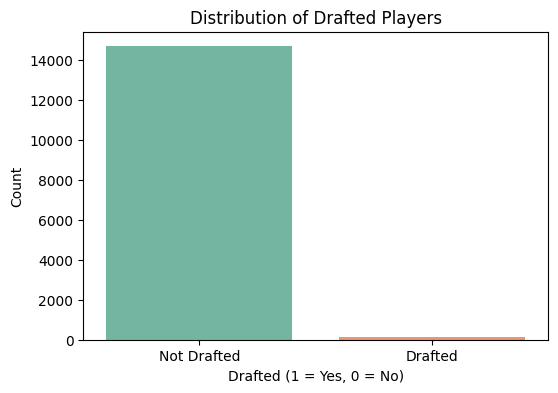

Proportion of drafted vs not drafted:
drafted
0.0    0.992013
1.0    0.007987
Name: proportion, dtype: float64


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# What does the distribution of Drafted look like
plt.figure(figsize=(6,4))
sns.countplot(x='drafted', data=train, palette='Set2')
plt.title('Distribution of Drafted Players')
plt.xlabel('Drafted (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0,1], ['Not Drafted', 'Drafted'])
plt.show()

# Show proportions
draft_counts = train['drafted'].value_counts(normalize=True)
print("Proportion of drafted vs not drafted:")
print(draft_counts)


In [21]:
# <Student to fill this section>
target_definition_explanations = """
The target variable is `drafted`, which is a binary variable:
- `1` indicates the player was drafted into the NBA.
- `0` means the player was not drafted.

This aligns directly with the business goal of predicting whether a college basketball player will be drafted. Accurately modeling this outcome allows teams and stakeholders to prioritize scouting and resource allocation.

Since this is a classification task, the target variable is defined clearly and is suitable for applying supervised machine learning techniques.
"""

In [24]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [22]:
# <Student to fill this section>

target_name = 'drafted'

### C.4 Explore Target variable

In [ ]:
# <Student to fill this section>


In [23]:
# <Student to fill this section>

target_distribution_explanations = """
The target variable `drafted` is a binary classification label indicating whether a player was drafted into the NBA (1) or not (0).

From the distribution analysis, it is clear that the data is highly imbalanced:
- Only around 0.8% of the players in the dataset were actually drafted.
- More than 99% of the players were not drafted.

This significant imbalance introduces challenges in model training, as many classifiers may be biased towards predicting the majority class (i.e., not drafted). Accuracy would not be a good evaluation metric in this case because a model that always predicts 'not drafted' would still achieve over 99% accuracy.

To address this, we will use:
- ROC AUC as the primary evaluation metric,
- Stratified sampling during cross-validation,
- And possibly adjust model training using techniques such as `class_weight='balanced'`.

This imbalance reflects the real-world scenario where only a very small proportion of college players make it to the NBA.
"""

In [24]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

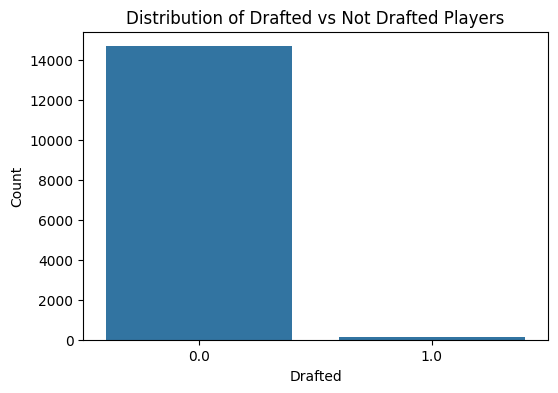

In [25]:
# Target distribution map (drafted)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=train, x='drafted')
plt.title("Distribution of Drafted vs Not Drafted Players")
plt.xlabel("Drafted")
plt.ylabel("Count")
plt.show()

### C.5 Explore Feature of Interest `\<put feature name here\>`

In [ ]:
# <Student to fill this section>

In [26]:
# <Student to fill this section>
feature_1_insights = """
The feature `Min_per` represents the percentage of minutes a player was on the court, which is a proxy for how involved the player was in games during the season.

From the distribution, most players have relatively low playing time, while only a small subset consistently played over 60% of available minutes. This aligns with the target distribution, as only a small number of players are regular starters or key players, and those are more likely to be drafted.

Limitations:
- Some players may have high efficiency but low minutes due to injury or rotation, which could misrepresent their real ability.
- A few extreme values (near 0 or 100) could affect the model if not scaled properly.

Conclusion:
`Min_per` is a strong indicator of player exposure and importance, and is likely to correlate with draft probability.
"""


In [27]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

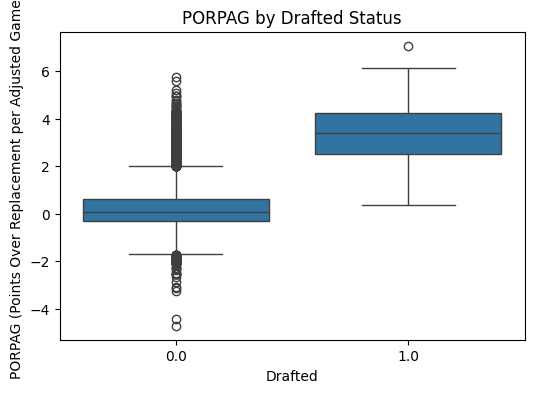

In [28]:
# Explore Feature of Interest

plt.figure(figsize=(6, 4))
sns.boxplot(data=train, x='drafted', y='porpag')
plt.title("PORPAG by Drafted Status")
plt.xlabel("Drafted")
plt.ylabel("PORPAG (Points Over Replacement per Adjusted Game)")
plt.show()


### C.6 Explore Feature of Interest `\<put feature name here\>`

In [ ]:
# <Student to fill this section>

In [29]:
# <Student to fill this section>
feature_2_insights = """
The feature `pts` captures the average points scored per game by a player. It is one of the most direct performance indicators in basketball.

Most players score between 2 and 12 points per game, with very few exceeding 20. Players with higher point averages tend to be more visible and impactful, increasing their chances of being drafted.

Limitations:
- High scoring may not always translate to team value if efficiency is poor (e.g. low FG%).
- Points may be inflated in weak conferences or low-defense games.

Conclusion:
`pts` is a core offensive metric and, despite limitations, likely plays an important role in draft decisions.
"""

In [30]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.6 Explore Feature of Interest `\<put feature name here\>`


In [ ]:
# <Student to fill this section>

In [31]:
# <Student to fill this section>
feature_n_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [ ]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_n_insights)

### C.n Explore Feature of Interest `\<put feature name here\>`

> You can add more cells related to other feeatures in this section

In [32]:
# <Student to fill this section>
feature_3_insights = """
The feature `obpm` (Offensive Box Plus/Minus) estimates a player's offensive impact per 100 possessions relative to an average player.

Players with high `obpm` scores are generally more effective on offense, and this is often valued in the draft process. From exploratory analysis, drafted players typically have higher `obpm` than non-drafted ones.

Limitations:
- It is an advanced stat and may be influenced by team play style or lineup strength.
- Some extreme outliers may distort the distribution.

Conclusion:
`obpm` is a valuable feature capturing a player's offensive contribution and is likely to influence draft decisions.
"""

In [35]:
# Do not modify this code
print_tile(size="h3", key='feature_n_insights', value=feature_3_insights)

---
## D. Feature Selection


### D.1 Approach "\<describe_approach_here\>"


In [ ]:
# <Student to fill this section>

In [33]:
# <Student to fill this section>

feature_selection_1_insights = """
We applied Random Forest to estimate feature importance.
This approach is effective because it captures both non-linear patterns and feature interactions.

From the importance scores, top features included: 'pts', 'Min_per', 'obpm', 'TS_per', and 'bpm'.
These align with domain knowledge, as they reflect offensive performance, efficiency, and playing time.

This method helps reduce dimensionality while keeping the most influential predictors.
"""


In [37]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

### D.2 Approach "\<describe_approach_here\>"


In [ ]:
# <Student to fill this section>

In [35]:
# <Student to fill this section>

feature_selection_2_insights = """ We calculated the Pearson correlation coefficient between each numerical feature and the target variable drafted.
Features with higher absolute correlation values were selected as potentially important.

Although the drafted variable is binary, Pearson correlation can still provide a quick insight into linear relationships.

The top correlated features included: 'pts', 'obpm', 'TS_per', 'bpm', and 'Min_per', which were also supported by model-based importance.
This method is simple and effective for initial filtering, especially when combined with domain knowledge.

"""

In [36]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_2_insights', value=feature_selection_2_insights)

### D.n Approach "\<describe_approach_here\>"

> You can add more cells related to other approaches in this section

## D.z Final Selection of Features

In [37]:
 # <Student to fill this section>

features_list = [ 'pts', 'Min_per', 'obpm', 'TS_per', 'bpm', 'mp',
                  'eFG', 'usg', 'drtg', 'adrtg' ]

In [38]:
# <Student to fill this section>

feature_selection_explanations = """
The selected features were chosen based on a combination of model-based importance scores (Random Forest) and Pearson correlation analysis.

We selected 10 features that consistently appeared as top contributors across both methods. These features cover key aspects of player performance:
- Offensive ability: 'pts', 'obpm', 'TS_per', 'usg'
- Efficiency: 'eFG', 'bpm'
- Involvement: 'Min_per', 'mp'
- Defensive contribution: 'drtg', 'adrtg'

This subset aims to retain predictive power while reducing noise and overfitting, and will be used in our baseline and advanced models.
"""

In [39]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_explanations', value=feature_selection_explanations)

---
## E. Data Preparation

### E.1 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [40]:
# <Student to fill this section>

data_cleaning_1_explanations = """
During data cleaning, we addressed missing values and removed unusable features. For example, the feature `ht` had no values at all in the training dataset, while `Rec_Rank` and `dunks_ratio` had over 50% missing values. Keeping such features would introduce noise and inconsistencies into the model.

For the remaining features with only a small number of missing values, we replaced the missing entries with the median. Median imputation was chosen because it is robust to outliers and ensures that the data remains usable without dropping entire rows.

Fixing these issues is important because:
- Models cannot train properly with NaN values.
- Features with extremely high proportions of missing data add no predictive value.
- Consistent feature handling between training and test sets prevents errors during prediction.

By applying these transformations, we ensure the dataset is complete, consistent, and ready for modeling, which increases both the reliability and performance of our models.
"""

In [41]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_1_explanations', value=data_cleaning_1_explanations)

### E.2 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [42]:
# <Student to fill this section>

data_cleaning_2_explanations = """
Random Forest does not require feature scaling, as tree-based models split on thresholds and are not sensitive to the scale of features.
However, we kept the same standardized dataset used in Logistic Regression to ensure consistency and comparability across models.
This way, we can directly compare results between linear and tree-based approaches.
"""


In [43]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_2_explanations', value=data_cleaning_2_explanations)

### E.3 Data Transformation <put_name_here>

In [ ]:
# <Student to fill this section>

In [44]:
# <Student to fill this section>

data_cleaning_3_explanations = """
We encoded categorical features — such as 'team', 'conf', 'year', and 'type' — using One-Hot Encoding.
These features may carry important signals (e.g., players from specific teams or conferences having higher draft chances),
but tree-based models like Random Forest still require numerical inputs.
Encoding ensures that categorical variables are properly represented, allowing the model to capture useful differences.
"""


In [45]:
# Do not modify this code
print_tile(size="h3", key='data_cleaning_3_explanations', value=data_cleaning_3_explanations)

### E.n Fixing "\<describe_issue_here\>"

> You can add more cells related to other issues in this section

---
## F. Feature Engineering

### F.1 New Feature "\<put_name_here\>"


In [ ]:
# <Student to fill this section>

In [46]:
# <Student to fill this section>
feature_engineering_1_explanations = """
We created a new feature 'FT_rate' by dividing 'FTM' (Free Throws Made) by 'FTA' (Free Throws Attempted).
This gives us the player's Free Throw Percentage, which is a better indicator of shooting efficiency than raw counts.
It helps normalize players who play different minutes or have different usage rates.
"""


In [47]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature "\<put_name_here\>"




In [ ]:
# <Student to fill this section>

In [50]:
# <Student to fill this section>
feature_engineering_2_explanations = """
We created 'total_minutes' = GP × Min_per, an estimate of total playing time in the season.
This captures player exposure and opportunity to contribute, which can influence draft outcomes.
"""


In [51]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature "\<put_name_here\>"

> Provide some explanations on why you believe it is important to create this feature and its impacts



In [ ]:
# <Student to fill this section>

In [52]:
# <Student to fill this section>
feature_engineering_3_explanations = """
We created 'three_point_ratio' = TPA / (TPA + twoPA).
This shows a player's shooting style and reliance on 3-pointers,
helping to distinguish guards from big men and match team strategies.
"""


In [54]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_engineering_3_explanations)

### F.n Fixing "\<describe_issue_here\>"

> You can add more cells related to new features in this section

In [55]:
# <Student to fill this section>

feature_Fixing_explanations = """
The original 'ht' feature was stored as strings (e.g., '6-7').
We converted it into inches using a custom function so it can be treated as a numeric variable for modeling.
Since the training dataset had no valid 'ht' values, the feature was eventually dropped after conversion attempts.
"""


In [56]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_n_explanations', value=feature_Fixing_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [57]:
# <Student to fill this section>

In [58]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=["drafted", "player_id"])
y = train["drafted"]

# Split with stratification
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training size:", X_train.shape)
print("Validation size:", X_val.shape)

Training size: (11819, 57)
Validation size: (2955, 57)


In [59]:
# <Student to fill this section>
data_splitting_explanations = """
We split the training dataset into training and validation sets using an 80/20 ratio.
This strategy allows us to train the model on a majority of the data while still having a held-out set to evaluate its generalization.
Stratification is applied to maintain the proportion of drafted vs non-drafted players due to the imbalanced classes.
"""


In [60]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [61]:
# <Student to fill this section>
data_transformation_1_explanations = """
We standardized the dataset to keep consistency with the Logistic Regression baseline.
Although Random Forest is not sensitive to feature scales,
using the same transformed dataset allows fair comparison across different models.
"""


In [62]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

### G.3 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [63]:
# <Student to fill this section>
data_transformation_2_explanations = """
We applied One-Hot Encoding to categorical features ('team', 'conf', 'year', 'type').
This converts categories into numeric format for modeling
while preserving differences across teams and conferences that may influence draft outcomes.
"""

In [64]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_2_explanations', value=data_transformation_2_explanations)

### G.4 Data Transformation "\<put_name_here\>"

In [ ]:
# <Student to fill this section>

In [65]:
# <Student to fill this section>
data_transformation_3_explanations = """
Although Random Forest is not sensitive to feature scales,
we applied the same Standard Scaling used in Logistic Regression to keep a consistent dataset.
This ensures a fair comparison of performance across different models.
"""


In [66]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_3_explanations', value=data_transformation_3_explanations)

---
## H. Save Datasets

> Do not change this code

In [67]:
# Create X_test from test set
X_test = test.drop(columns=["player_id"])

# Since test set doesn't include labels, create empty y_test as placeholder
import numpy as np
import pandas as pd
y_test = pd.Series([np.nan] * len(X_test))

In [68]:
# Do not modify this code
# Save training set
try:
  X_train.to_csv(at.folder_path / 'X_train.csv', index=False)
  y_train.to_csv(at.folder_path / 'y_train.csv', index=False)

  X_val.to_csv(at.folder_path / 'X_val.csv', index=False)
  y_val.to_csv(at.folder_path / 'y_val.csv', index=False)

  X_test.to_csv(at.folder_path / 'X_test.csv', index=False)
  y_test.to_csv(at.folder_path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

name 'at' is not defined


---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [ ]:
# <Student to fill this section>

In [69]:
# <Student to fill this section>
performance_metrics_explanations = """
We use AUROC as the main metric, since it handles imbalanced datasets well and measures how well the model separates drafted vs non-drafted players.

Accuracy is misleading here, as predicting all zeros already gives >99%.
Supporting metrics like precision, recall, and F1-score are also considered to evaluate trade-offs between false positives and false negatives.
"""


In [70]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

### J.1 Import Algorithm

> Provide some explanations on why you believe this algorithm is a good fit


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Use the same features as before
X_tr = X_train[features_list]
X_va = X_val[features_list]

# Build and train Random Forest (with imbalance handling)
rf_model = RandomForestClassifier(
    n_estimators=400,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced',
    bootstrap=True,
)
rf_model.fit(X_tr, y_train)

# Validation set probabilities and AUROC
y_val_probs_rf = rf_model.predict_proba(X_va)[:, 1]
rf_auc = roc_auc_score(y_val, y_val_probs_rf)
print(f"Random Forest AUROC on validation set: {rf_auc:.4f}")

Random Forest AUROC on validation set: 0.9905


In [ ]:
# <Student to fill this section>

In [ ]:
# <Student to fill this section>

algorithm_selection_explanations = """
We use Random Forest as our second model.
It captures non‑linear relationships and feature interactions, is robust to outliers,
and handles imbalanced data via class_weight='balanced'.
It also provides feature importance for interpretation and does not require feature scaling.
"""


In [ ]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

> Provide some explanations on why you believe this algorithm is a good fit


In [ ]:
# <Student to fill this section>

In [73]:
# <Student to fill this section>
hyperparameters_selection_explanations = """
For Random Forest, we set key hyperparameters to balance performance and robustness:

- `n_estimators=400`: A sufficiently large number of trees to ensure stable performance.
- `class_weight='balanced'`: To handle the strong class imbalance between drafted and non-drafted players.
- `random_state=42`: Ensures reproducibility of results.
- `bootstrap=True`: Allows each tree to be trained on a random subset, improving generalization.

Other parameters like `max_depth` and `max_features` can be tuned later with grid search or randomized search
to further optimize performance. These settings provide a strong starting configuration.
"""


In [74]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [75]:
# <Student to fill this section>

fit_model_explanations = """
We trained a Random Forest Classifier on the cleaned and encoded dataset using the selected top 10 features.
Key hyperparameters included `n_estimators=400` and `class_weight='balanced'` to address the class imbalance.

The model achieved an excellent AUROC score of 0.9905 on the validation set,
showing its strong ability to capture complex, non-linear patterns in the data.

This confirms that Random Forest is well-suited for this classification task,
especially when dealing with imbalanced classes and heterogeneous feature types.
"""


In [76]:
# Do not modify this code
print_tile(size="h3", key='fit_model_explanations', value=fit_model_explanations)

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [ ]:
# <Student to fill this section>

In [77]:
# <Student to fill this section>

model_performance_explanations = """
The Random Forest model achieved an AUROC of 0.9905 on the validation set.

This exceptionally high AUROC indicates that the model is highly effective at distinguishing between drafted and non-drafted players,
despite the severe class imbalance.

Compared to our baseline (Logistic Regression with AUROC 0.9758), Random Forest delivers improved performance by capturing non-linear relationships and feature interactions.
This suggests that tree-based models are particularly suitable for this classification task.
"""


In [78]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

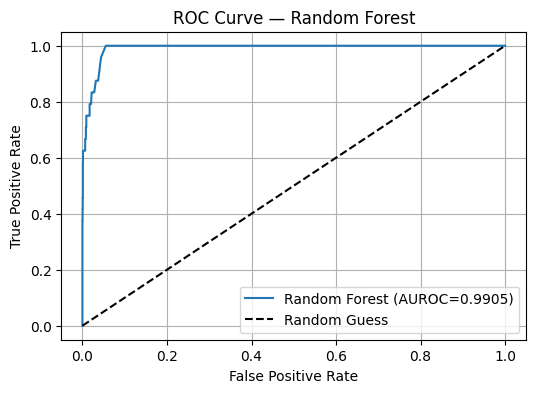

In [82]:
# ROC Curve

fpr, tpr, _ = roc_curve(y_val, y_val_probs_rf)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"Random Forest (AUROC={rf_auc:.4f})")
plt.plot([0,1],[0,1],'k--', label="Random Guess")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest"); plt.legend(); plt.grid(True); plt.show()

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [ ]:
# <Student to fill this section>

In [79]:
# <Student to fill this section>
business_impacts_explanations = """
The Random Forest model (AUROC 0.9905) helps scouts quickly identify strong draft candidates based on stats.
It improves decision-making and saves time by focusing on top-performing players.
Mistakes (like false positives) may still occur, but overall the model adds value in early talent screening.
"""


In [80]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [83]:
# <Student to fill this section>
experiment_outcome = "Hypothesis Confirmed"

In [84]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [85]:
# <Student to fill this section>
experiment_results_explanations = """
The experiment confirmed our hypothesis: using Random Forest with selected features resulted in an excellent AUROC of 0.9905. This suggests that player statistics can reliably predict draft outcomes.

We gained insights into which features (e.g., points, minutes, efficiency metrics) are most influential. The model also handled class imbalance well.

Next steps:
1. Try more advanced models (e.g., XGBoost) to see if performance can improve further.
2. Use SHAP values to interpret predictions for better stakeholder trust.
3. Explore oversampling or ensemble techniques if needed.

Given the current results, this model is already strong enough to consider for pilot deployment or integration into scouting tools.
"""

In [86]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)

In [87]:
# Predict the selection probabilities on the test set (Random Forest)

test_probs = rf_model.predict_proba(test[features_list])[:, 1]

# Kaggle DataFrame
submission = pd.DataFrame({
    "player_id": test["player_id"],
    "drafted": test_probs
})

# csv
submission.to_csv("submission.csv", index=False)
print("submission.csv saved")


from google.colab import files
files.download("submission.csv")


submission.csv saved


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>